In [29]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f = open("./mem_alexnet.pkl","rb")
lookup_table = pickle.load(f)

In [30]:
def deal_outlier(df:pd.DataFrame):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        median = df[col].median()
        df[col][lower > df[col]] = median
        df[col][df[col] > upper] = median
    return df

In [31]:

count = 0
total = 0
layer_names = list(lookup_table.keys())
KEY_LATENCY = "latency"
layer_lookup_table = {}
print(lookup_table.keys())
for layer_name in layer_names:
    table = pd.DataFrame(lookup_table[layer_name][KEY_LATENCY])
    cs = table.columns
    ncs = []
    for c in cs:
        ncs.append("%d_%d"%(c[0],c[1]))
    table.columns = ncs
    layer_lookup_table[layer_name] = table

odict_keys(['features.0', 'features.3', 'features.6', 'features.8', 'features.10', 'classifier.1', 'classifier.4', 'classifier.6'])


In [32]:
for l in layer_names:
    print(l, len(layer_lookup_table[l].columns))

features.0 8
features.3 192
features.6 1152
features.8 1536
features.10 1024
classifier.1 9216
classifier.4 4096
classifier.6 64


In [33]:
table = pd.DataFrame(layer_lookup_table[layer_names[0]])
# table.plot(legend=None)
display(table.describe())

,3_64,3_56,3_48,3_40,3_32,3_24,3_16,3_8
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,3.001898e+06,2.978850e+06,2.959538e+06,2.943842e+06,2.934076e+06,2.920051e+06,2.907366e+06,2.888952e+06
std,3.136877e+04,2.688126e+04,2.364578e+04,2.449428e+04,2.339176e+04,2.429838e+04,2.436331e+04,2.421416e+04
min,2.913504e+06,2.902420e+06,2.892268e+06,2.874156e+06,2.867544e+06,2.850920e+06,2.838044e+06,2.820052e+06
25%,3.012576e+06,2.986635e+06,2.966476e+06,2.950952e+06,2.940782e+06,2.927561e+06,2.914547e+06,2.896076e+06
50%,3.013108e+06,2.986786e+06,2.966702e+06,2.951346e+06,2.941074e+06,2.927650e+06,2.914770e+06,2.896380e+06
75%,3.013454e+06,2.987530e+06,2.967075e+06,2.951957e+06,2.941829e+06,2.927922e+06,2.915414e+06,2.896912e+06
max,3.014176e+06,2.990308e+06,2.968416e+06,2.952672e+06,2.943132e+06,2.928652e+06,2.915952e+06,2.897536e+06


,3_64,3_56,3_48,3_40,3_32,3_24,3_16,3_8
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,3.013234e+06,2.986934e+06,2.966810e+06,2.951561e+06,2.941429e+06,2.927763e+06,2.915039e+06,2.896584e+06
std,4.902723e+02,5.810703e+02,4.614564e+02,6.724650e+02,8.410962e+02,2.632904e+02,5.442722e+02,5.120050e+02
min,3.012552e+06,2.985904e+06,2.966224e+06,2.950668e+06,2.940588e+06,2.927560e+06,2.914484e+06,2.895996e+06
25%,3.012910e+06,2.986724e+06,2.966635e+06,2.951072e+06,2.940937e+06,2.927600e+06,2.914642e+06,2.896272e+06
50%,3.013240e+06,2.986786e+06,2.966702e+06,2.951429e+06,2.941081e+06,2.927650e+06,2.914813e+06,2.896392e+06
75%,3.013454e+06,2.987277e+06,2.966931e+06,2.951957e+06,2.941829e+06,2.927866e+06,2.915414e+06,2.896912e+06
max,3.014176e+06,2.987976e+06,2.967916e+06,2.952672e+06,2.943132e+06,2.928412e+06,2.915952e+06,2.897536e+06


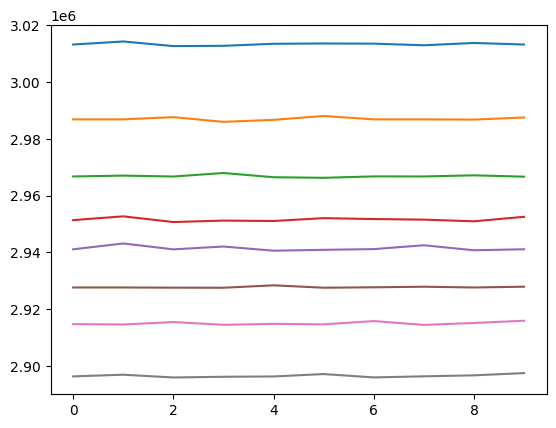

In [34]:
dealed_table = deal_outlier(table.copy(deep=True))
dealed_table.plot(legend=None)
display(dealed_table.describe())

8
8
192
1152
1536
1024
9216
4096


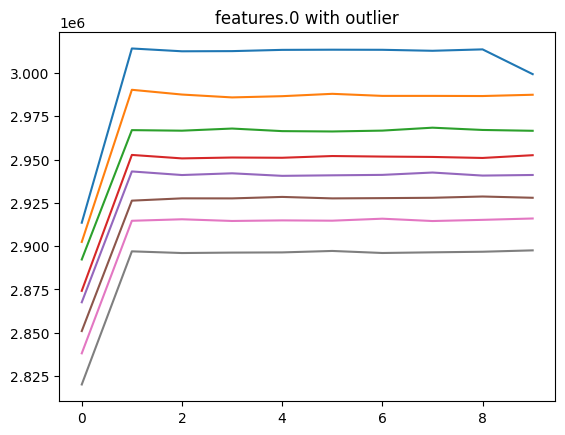

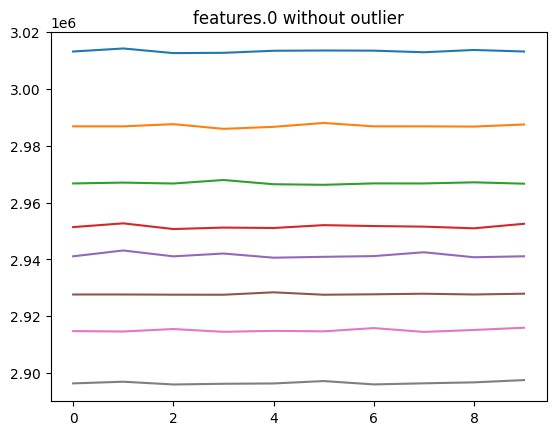

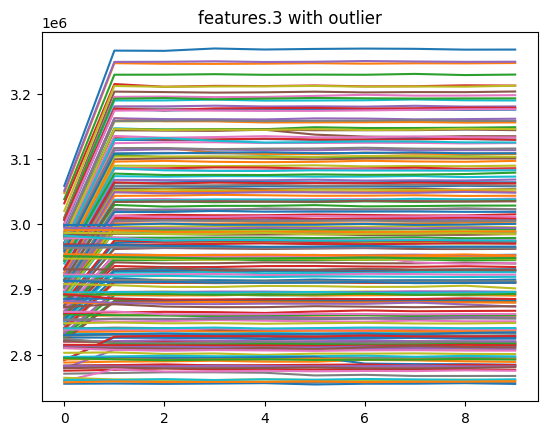

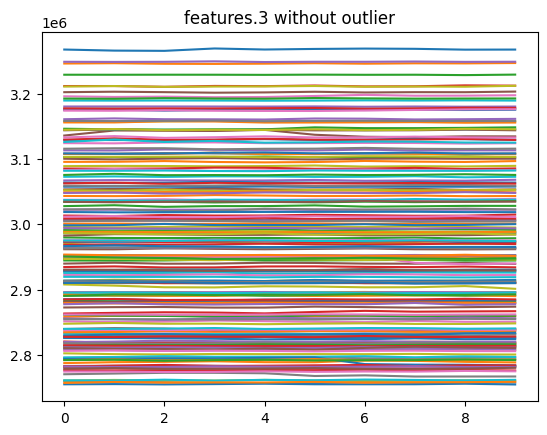

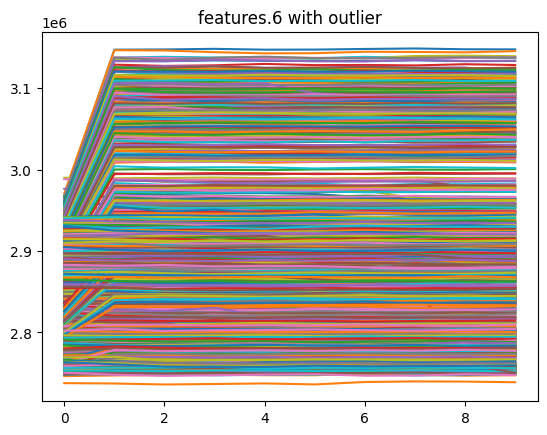

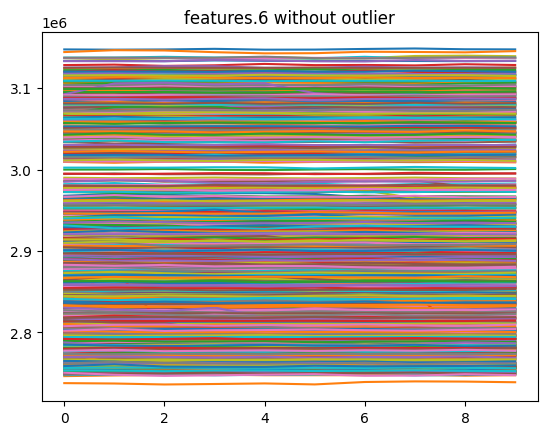

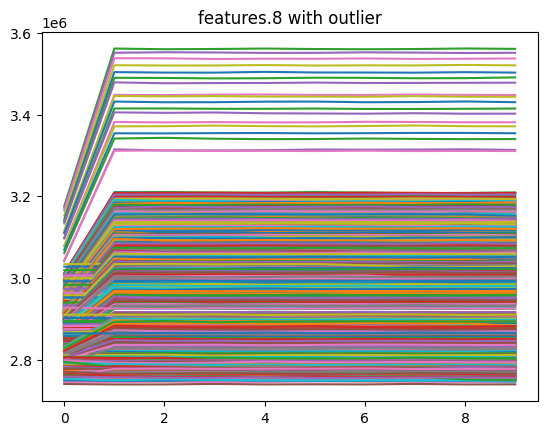

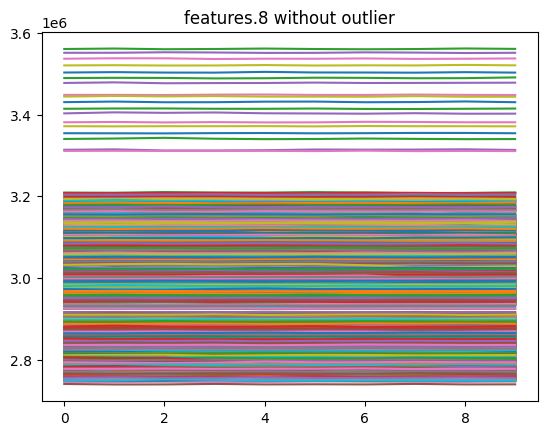

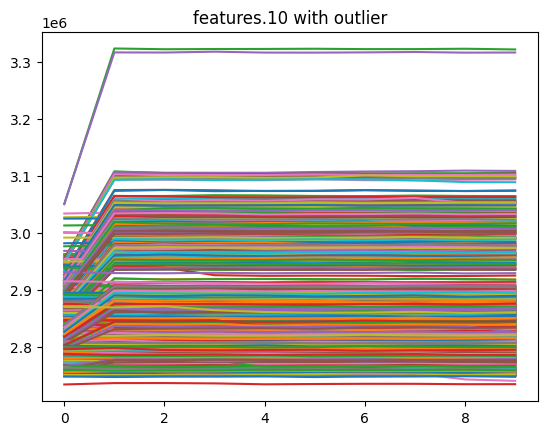

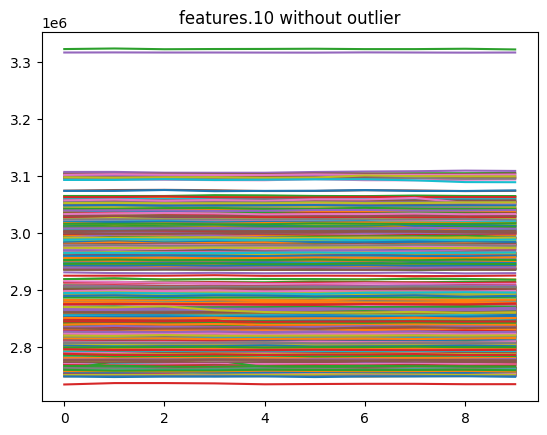

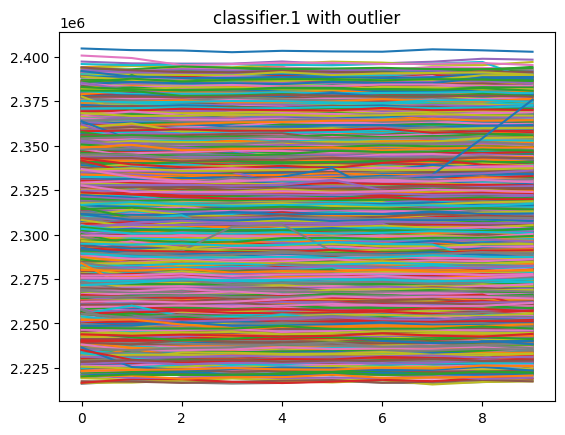

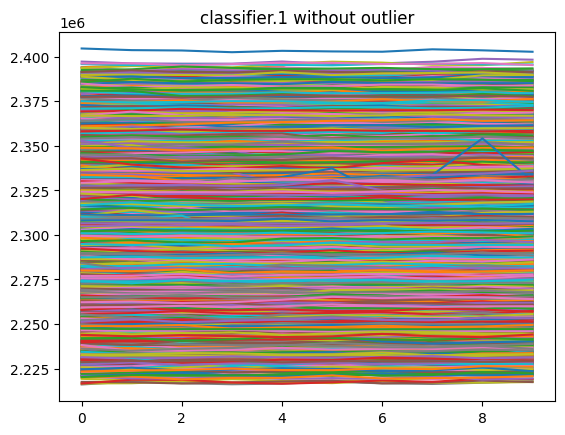

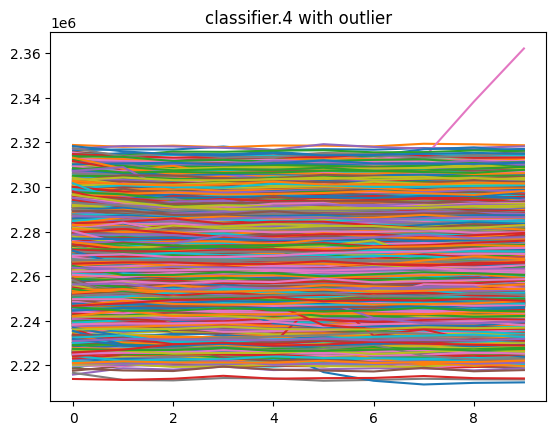

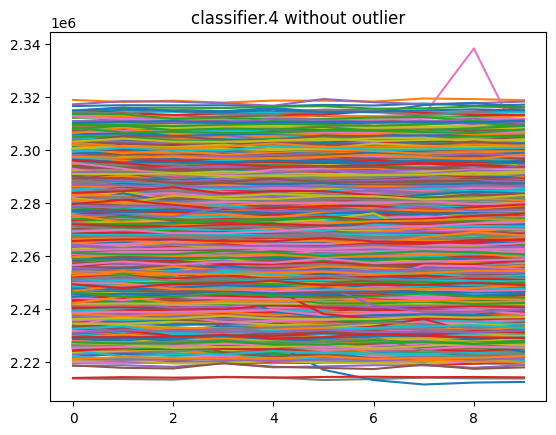

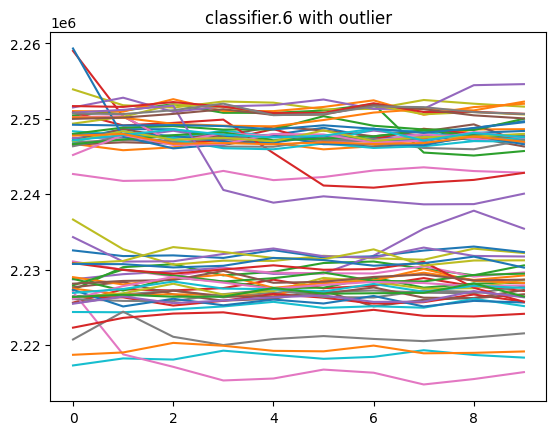

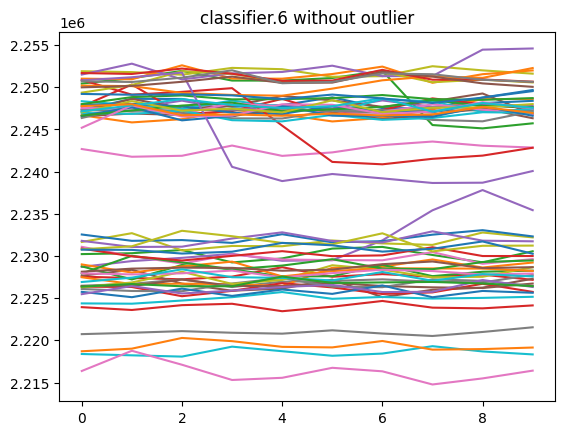

In [35]:
for l in layer_names:
    print(len(table.columns))
    table = pd.DataFrame(layer_lookup_table[l])
    table.plot(legend=None, title=l + " with outlier")
    new_table = deal_outlier(table.copy(deep=True))
    new_table.plot(legend=None, title=l + " without outlier")

In [36]:
# for l in layer_names:
#     table = pd.DataFrame(layer_lookup_table[l])
#     a = table.median(axis=0)
table = pd.DataFrame(layer_lookup_table[layer_names[0]])
table.median()

3_64    3013108.0
3_56    2986786.0
3_48    2966702.0
3_40    2951346.0
3_32    2941074.0
3_24    2927650.0
3_16    2914770.0
3_8     2896380.0
dtype: float64